In [28]:
import pandas as pd
import json
import os

json_files = {}

folder = "results_v2"
files = os.listdir(folder)


for file in files:
    with open(folder+"/"+file, "r") as f:
        df = pd.DataFrame(json.load(f))
        json_files[file] = df

folder = "results_delta_2025-06-28"
files = os.listdir(folder)


for file in files:
    with open(folder+"/"+file, "r") as f:
        df = pd.DataFrame(json.load(f))
        json_files[file] = df

folder = "results"
files = os.listdir(folder)


for file in files:
    if file[-4:] != "json":
        continue
    with open(folder+"/"+file, "r") as f:
        df = pd.DataFrame(json.load(f))
        json_files[file] = df


df = pd.concat(json_files.values(), axis = 0)
df

,tensor_location,criterion_score,layer_name,value_before,value_after
0,"[0, 0, 349]",0.0896,class_token,0.015516,3.003372
0,"[192, 0, 20, 30]",0.7614,conv_proj.weight,0.000377,0.684720
0,[376],0.7580,conv_proj.bias,0.016747,1.180125
0,"[0, 4, 201]",0.7608,encoder.pos_embedding,0.003855,-1.331274
0,"[0, 0, 28]",0.0670,class_token,-0.000617,12.727129
...,...,...,...,...,...
1515,[131],0.7608,heads.head.bias,-0.013511,-0.216172
1516,[576],0.7608,heads.head.bias,-0.028518,-0.456286
1517,[703],0.7608,heads.head.bias,0.006955,0.000435
1518,[361],0.7608,heads.head.bias,0.010427,0.166830


In [29]:
df.dtypes

tensor_location     object
criterion_score    float64
layer_name          object
value_before       float64
value_after        float64
dtype: object

In [30]:
df = df.dropna()

from math import log10, floor
def round_to_1(x):
    return round(x, -int(floor(log10(abs(x)))))

def round_to_nearest_power_of_10_str(num):
    if num == 0:
        return "0e0"
    if abs(num) > 1e32:
        return ">1e32"
    exponent = round(log10(abs(num)))
    return f"1e{exponent}"

df['tensor_location'] = df['tensor_location'].astype(str).astype('|S') # which will by default set the length to the max len it encounters
df['layer_name'] = df['layer_name'].astype('|S') # which will by default set the length to the max len it encounters
df['delta_val'] = (df['value_after'] - df["value_before"])
df['delta_val_non_abs'] = (df['value_after'] - df["value_before"])
df['delta_val'] = df["delta_val"].abs()
df['delta'] = df['delta_val'].apply(round_to_nearest_power_of_10_str).astype('|S')
df.dtypes

C:\Users\wwden\AppData\Local\Temp\ipykernel_3368\1732033921.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tensor_location'] = df['tensor_location'].astype(str).astype('|S') # which will by default set the length to the max len it encounters
C:\Users\wwden\AppData\Local\Temp\ipykernel_3368\1732033921.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['layer_name'] = df['layer_name'].astype('|S') # which will by default set the length to the max len it encounters
C:\Users\wwden\AppData\Local\T

tensor_location         |S16
criterion_score      float64
layer_name              |S62
value_before         float64
value_after          float64
delta_val            float64
delta_val_non_abs    float64
delta                    |S5
dtype: object

In [31]:
df = df.sort_values(by = ["layer_name", "delta", "tensor_location", "criterion_score"]).reset_index(drop = True).sort_values(by = "delta_val")
df

,tensor_location,criterion_score,layer_name,value_before,value_after,delta_val,delta_val_non_abs,delta
1306,b'[16]',0.7608,b'encoder.layers.encoder_layer_0.ln_1.bias',-0.000004,-3.696932e-06,2.328306e-10,2.328306e-10,b'1e-10'
7243,b'[734]',0.7608,b'encoder.layers.encoder_layer_1.ln_2.bias',-0.000004,-4.019697e-06,4.656613e-10,4.656613e-10,b'1e-9'
22860,"b'[2995, 546]'",0.7608,b'encoder.layers.encoder_layer_2.mlp.0.weight',0.000006,5.581109e-06,4.656613e-10,4.656613e-10,b'1e-9'
2360,b'[221]',0.7608,b'encoder.layers.encoder_layer_0.ln_2.bias',-0.000007,-7.186279e-06,4.656613e-10,4.656613e-10,b'1e-9'
36082,b'[405]',0.7608,b'encoder.layers.encoder_layer_5.ln_2.bias',-0.000006,-5.738550e-06,4.656613e-10,-4.656613e-10,b'1e-9'
...,...,...,...,...,...,...,...,...
31729,b'[157]',0.0010,b'encoder.layers.encoder_layer_4.ln_2.weight',0.872265,2.968164e+38,2.968164e+38,2.968164e+38,b'>1e32'
59801,b'[5]',0.0014,b'encoder.ln.weight',0.885850,3.014393e+38,3.014393e+38,3.014393e+38,b'>1e32'
59809,b'[680]',0.0018,b'encoder.ln.weight',0.904132,3.076603e+38,3.076603e+38,3.076603e+38,b'>1e32'
59773,b'[32]',0.0010,b'encoder.ln.weight',0.931147,3.168528e+38,3.168528e+38,3.168528e+38,b'>1e32'


<Axes: xlabel='delta', ylabel='criterion_score'>

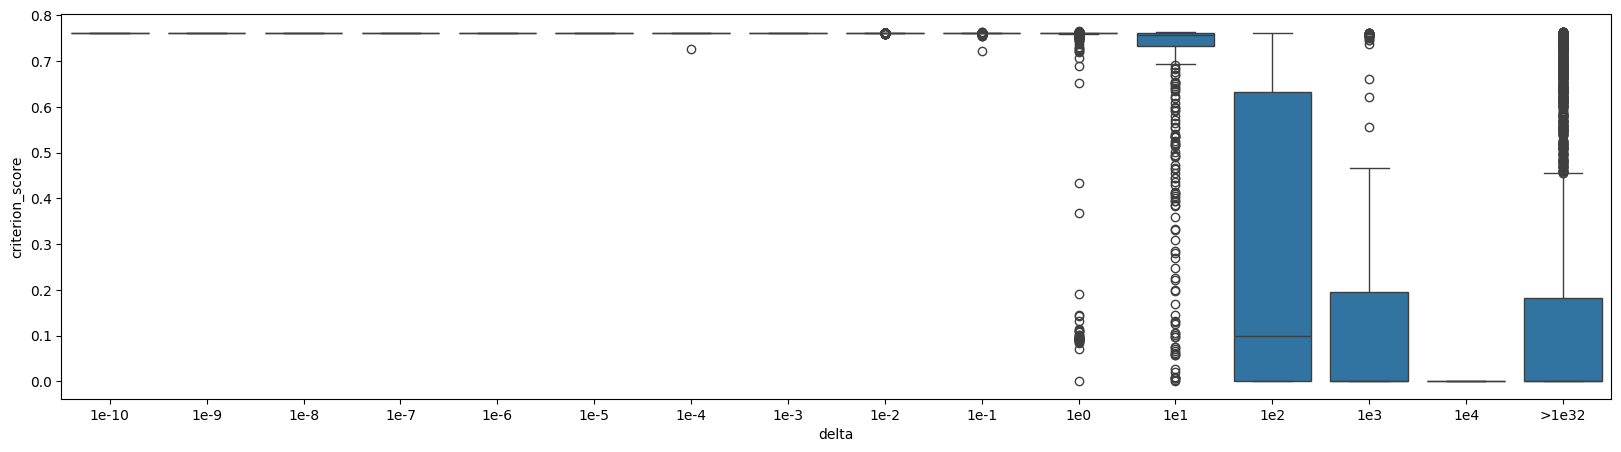

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
sns.boxplot(data = df, x = "delta", y = "criterion_score")

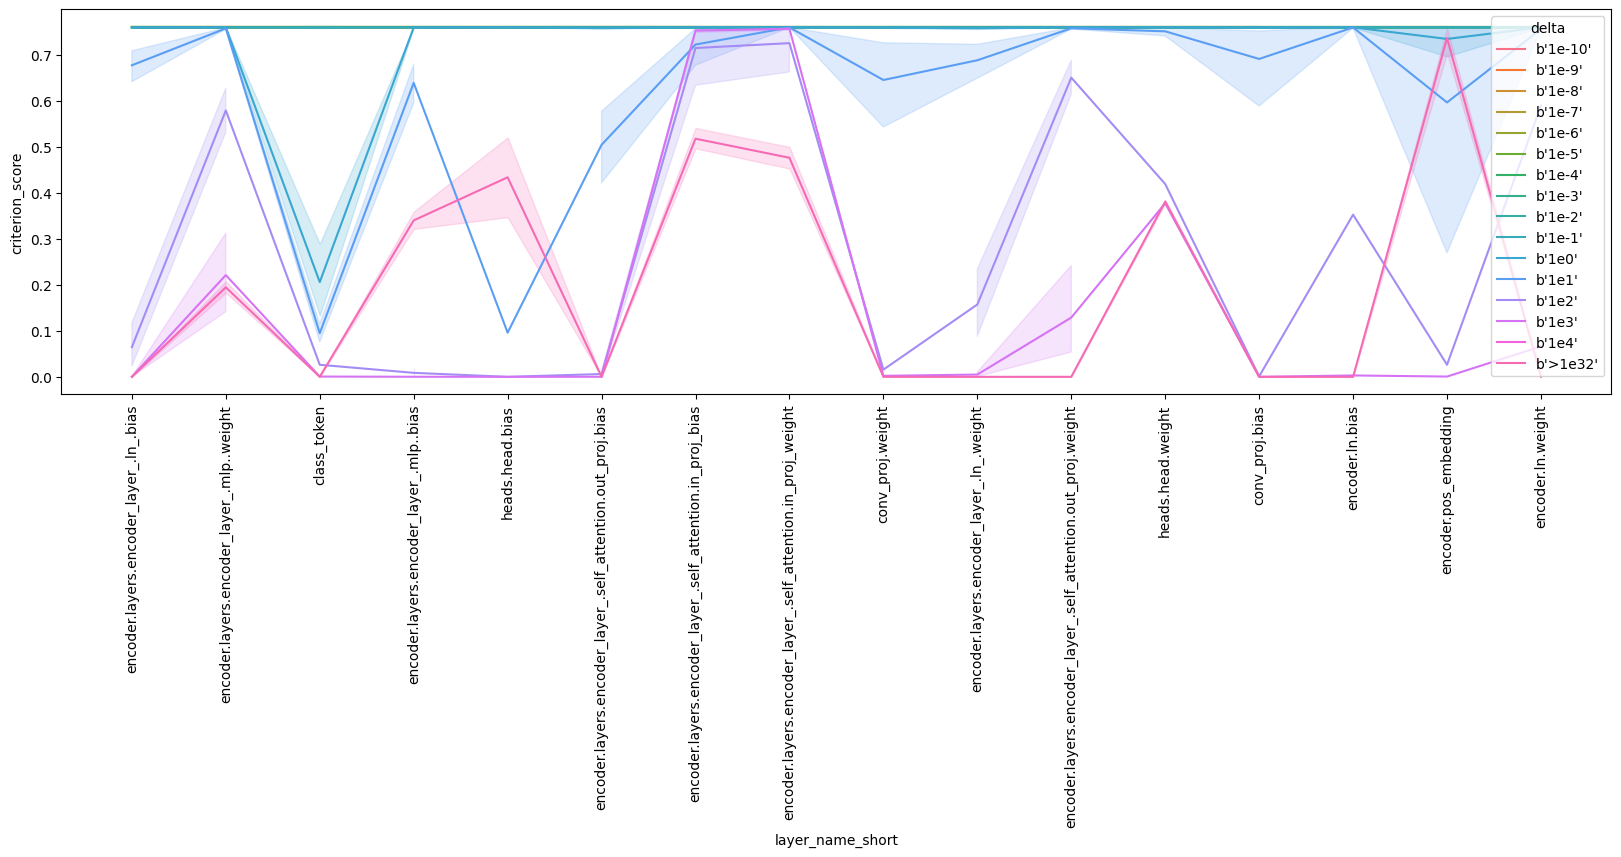

In [33]:
import matplotlib.pyplot as plt

df["layer_name_short"] = df["layer_name"].apply(lambda x: x.decode() if isinstance(x, bytes) else x).str.replace(r'\d+', '', regex=True)


plt.figure(figsize=(20,5))
sns.lineplot(data = df, x = "layer_name_short", y = "criterion_score", hue = "delta")
plt.xticks(rotation = 90)
plt.show()

In [34]:
df["delta"].value_counts()

C:\Users\wwden\AppData\Local\Temp\ipykernel_3368\857499797.py:1: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  df["delta"].value_counts()


delta
b'1e-2'     13287
b'>1e32'    10639
b'1e-1'      9578
b'1e-3'      7152
b'1e0'       6698
b'1e-4'      4221
b'1e-5'      3840
b'1e-6'      3154
b'1e-7'      1194
b'1e1'        537
b'1e-8'       362
b'1e2'        191
b'1e3'        154
b'1e-9'        32
b'1e-10'        1
b'1e4'          1
Name: count, dtype: int64

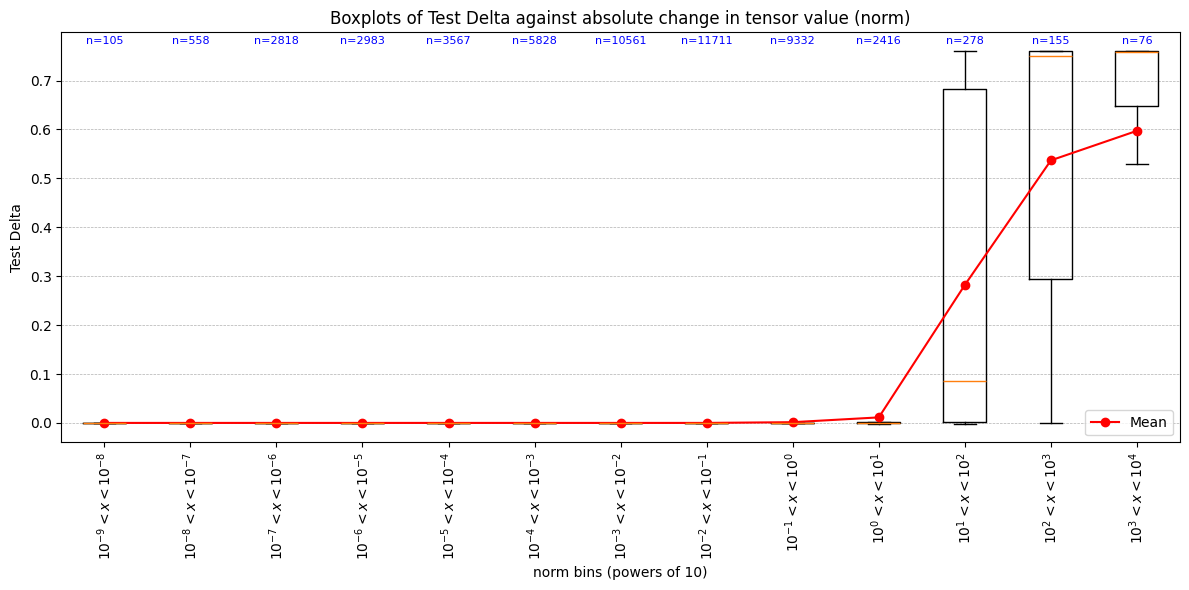

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df['criterion_score'] = 0.7608 - df['criterion_score']

bin_edges = np.logspace(-9, 4, num=14)
df['delta_bin'] = pd.cut(df['delta_val'], bins=bin_edges, right=False)
groups = [df.loc[df['delta_bin'] == interval, 'criterion_score'].values for interval in df['delta_bin'].cat.categories]

means = [grp.mean() if len(grp) > 0 else np.nan for grp in groups]
mean_delta_vals = [df.loc[df['delta_bin'] == interval, 'delta_val'].mean() for interval in df['delta_bin'].cat.categories]

labels = [f"$10^{{{int(np.log10(interval.left))}}} < x < 10^{{{int(np.log10(interval.right))}}}$" 
          for interval in df['delta_bin'].cat.categories]

counts = [len(grp) for grp in groups]

fig, ax = plt.subplots(figsize=(12, 6))

box = ax.boxplot(groups, positions=range(1, len(groups)+1), showfliers=False)
ax.plot(range(1, len(means)+1), means, marker='o', color='red', linestyle='-', label='Mean')

ax.set_xticks(range(1, len(labels)+1))
ax.set_xticklabels(labels, rotation=90)
ax.set_xlabel('norm bins (powers of 10)')
ax.set_ylabel('Test Delta')
ax.set_title('Boxplots of Test Delta against absolute change in tensor value (norm)')

# Add sample counts above each boxplot
for i, count in enumerate(counts, start=1):
    ax.text(i, ax.get_ylim()[1] - 0.027, f'n={count}', ha='center', va='bottom', fontsize=8, color='blue')

ax.grid(axis='y', linestyle='--', linewidth=0.5)
ax.legend()
plt.tight_layout()
plt.savefig("Boxplot_accuracy_norm.pdf")
plt.show()

df['criterion_score'] = df['criterion_score'] + 0.7608

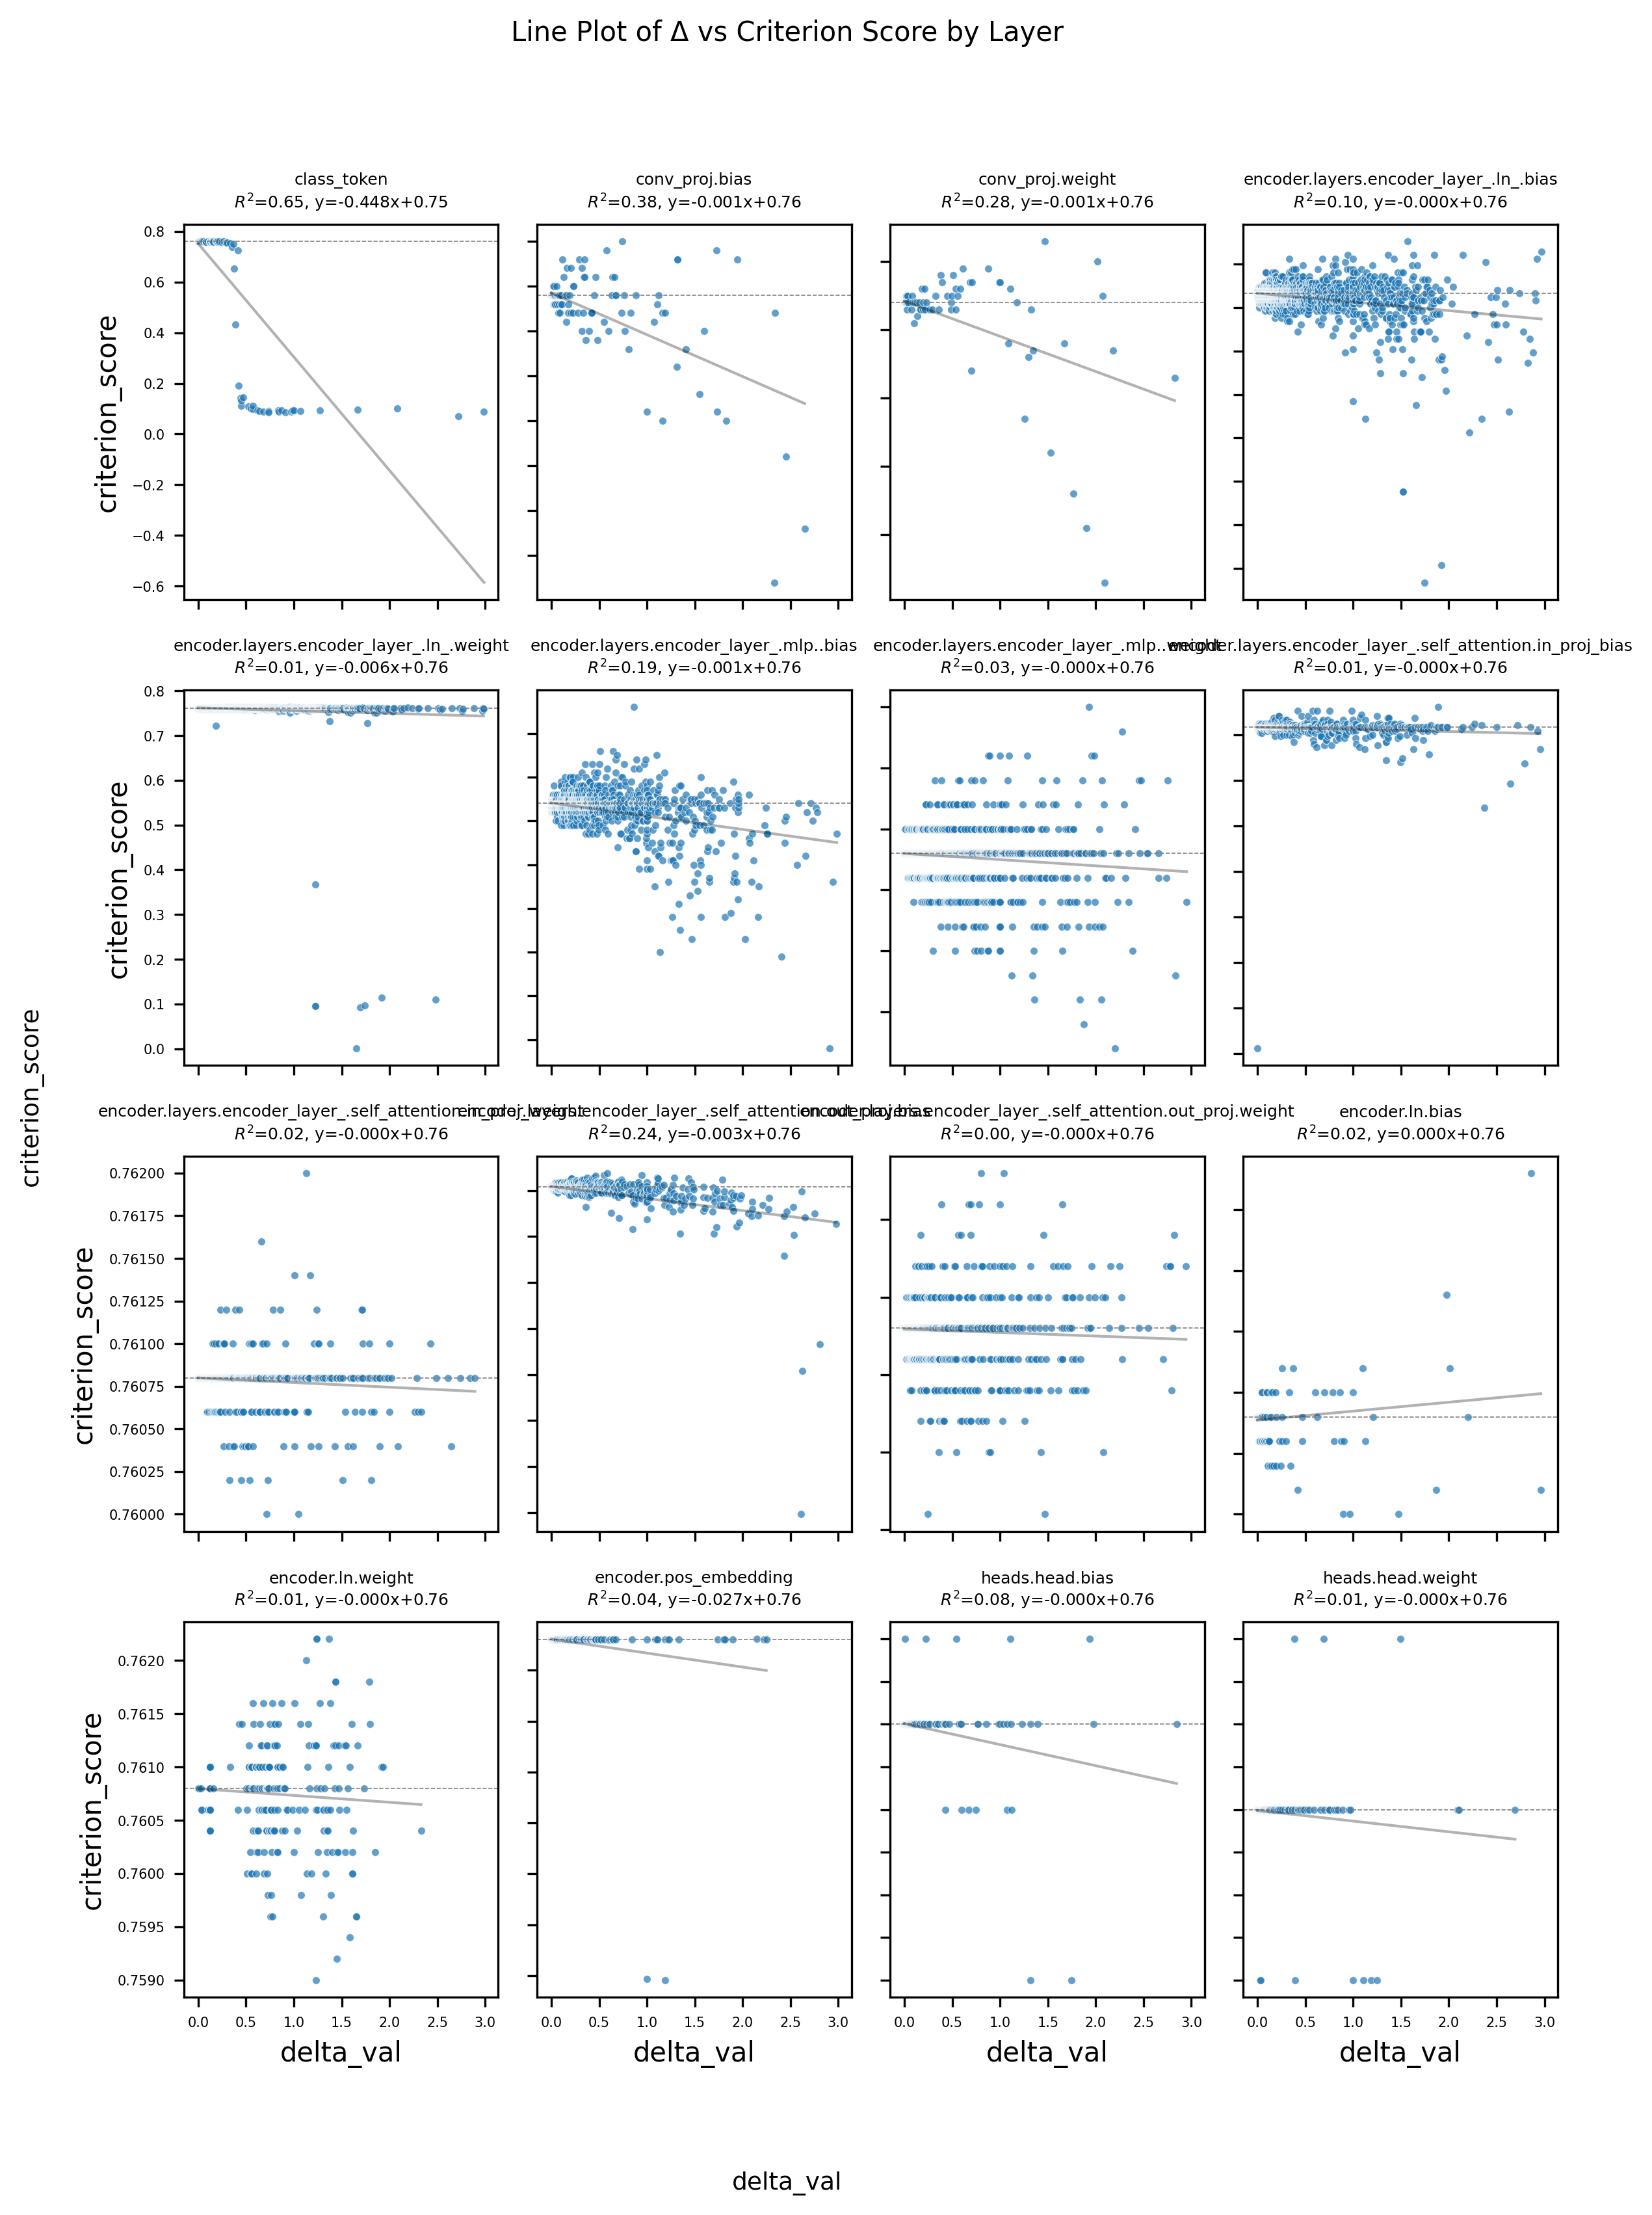

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df_filtered = df[df["delta_val"] < 3].copy()

layer_names = sorted(df_filtered["layer_name_short"].unique())[:16]  # ensure max 16
n_cols = 4
n_rows = 4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(8.2, 11.5), dpi=300, sharex=True, sharey=False)
axes = axes.flatten()

for i, layer in enumerate(layer_names):
    ax = axes[i]
    subset = df_filtered[df_filtered["layer_name_short"] == layer]
    if subset.empty:
        continue

    subset = subset.sort_values("delta_val")
    ax.axhline(y=0.7608, color='gray', linestyle='--', linewidth=0.4)
    X = subset["delta_val"].values.reshape(-1, 1)
    y = subset["criterion_score"].values

    reg = LinearRegression().fit(X, y)
    y_pred = reg.predict(X)
    r2 = r2_score(y, y_pred)
    slope = reg.coef_[0]
    intercept = reg.intercept_

    sns.scatterplot(x=subset["delta_val"], y=subset["criterion_score"], ax=ax, label=None, alpha=0.7, s=8)
    sns.lineplot(x=subset["delta_val"], y=y_pred, ax=ax, color='black', linewidth=1, label=None, alpha=0.3)

    ax.set_title(f"{layer}\n$R^2$={r2:.2f}, y={slope:.3f}x+{intercept:.2f}", fontsize=6)
    ax.tick_params(labelsize=5)
    ax.label_outer()

# Turn off unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

fig.suptitle("Line Plot of Δ vs Criterion Score by Layer", fontsize=10)
fig.supxlabel("delta_val", fontsize=9)
fig.supylabel("criterion_score", fontsize=9)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


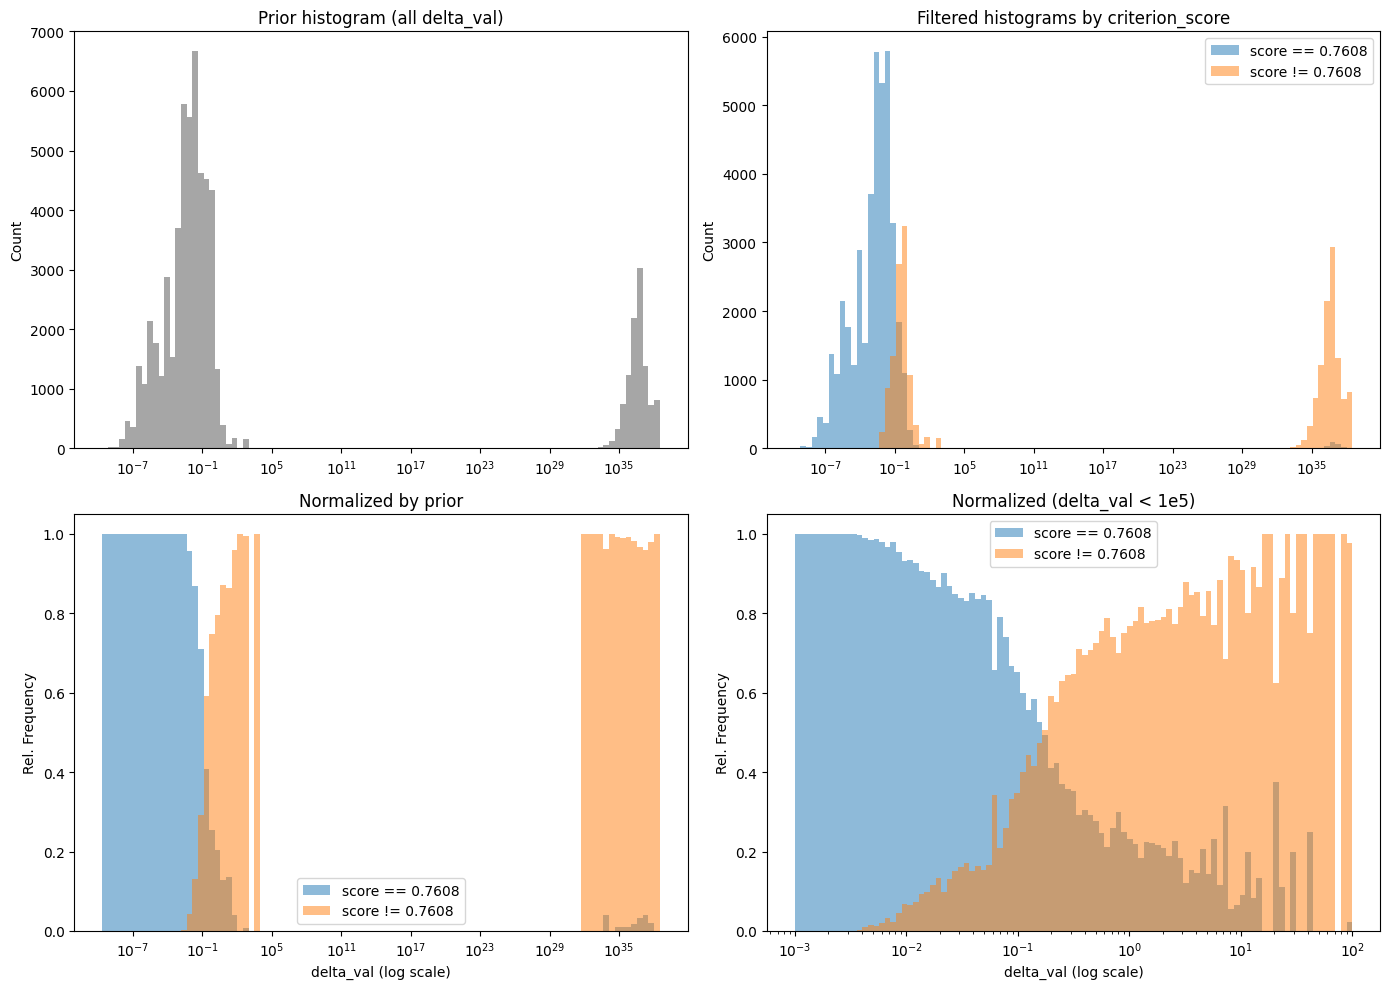

In [46]:
import numpy as np
import matplotlib.pyplot as plt

epsilon = 1e-10
score_val = 0.7608

# Prepare common subsets
vals_all = df["delta_val"]
vals1 = df[df["criterion_score"] == score_val]["delta_val"]
vals2 = df[df["criterion_score"] != score_val]["delta_val"]

def compute_histograms(vals_all, vals1, vals2, bins):
    hist_all, edges = np.histogram(vals_all, bins=bins)
    hist1, _ = np.histogram(vals1, bins=bins)
    hist2, _ = np.histogram(vals2, bins=bins)
    widths = np.diff(edges)
    return hist_all, hist1, hist2, edges, widths

fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=False)

# Plot 1: Raw histogram of all
min_val = vals_all.min()
max_val = vals_all.max()
bins = np.logspace(np.log10(min_val), np.log10(max_val), 100)
hist_all, hist1, hist2, edges, widths = compute_histograms(vals_all, vals1, vals2, bins)

axs[0, 0].bar(edges[:-1], hist_all, width=widths, align='edge', alpha=0.7, color='gray')
axs[0, 0].set_xscale('log')
axs[0, 0].set_title('Prior histogram (all delta_val)')
axs[0, 0].set_ylabel('Count')

# Plot 2: Filtered histogram
axs[0, 1].bar(edges[:-1], hist1, width=widths, align='edge', alpha=0.5, label='score == 0.7608')
axs[0, 1].bar(edges[:-1], hist2, width=widths, align='edge', alpha=0.5, label='score != 0.7608')
axs[0, 1].set_xscale('log')
axs[0, 1].set_title('Filtered histograms by criterion_score')
axs[0, 1].set_ylabel('Count')
axs[0, 1].legend()

# Plot 3: Normalized histogram, no filter
norm_hist1 = hist1 / (hist_all + epsilon)
norm_hist2 = hist2 / (hist_all + epsilon)

axs[1, 0].bar(edges[:-1], norm_hist1, width=widths, align='edge', alpha=0.5, label='score == 0.7608')
axs[1, 0].bar(edges[:-1], norm_hist2, width=widths, align='edge', alpha=0.5, label='score != 0.7608')
axs[1, 0].set_xscale('log')
axs[1, 0].set_title('Normalized by prior')
axs[1, 0].set_xlabel('delta_val (log scale)')
axs[1, 0].set_ylabel('Rel. Frequency')
axs[1, 0].legend()

# Plot 4: Normalized, thresholded
threshold_mask = (df["delta_val"] < 100) & (df["delta_val"] > 0.001)
vals_all_th = df.loc[threshold_mask, "delta_val"]
vals1_th = df[(df["criterion_score"] == score_val) & threshold_mask]["delta_val"]
vals2_th = df[(df["criterion_score"] != score_val) & threshold_mask]["delta_val"]

bins_th = np.logspace(np.log10(vals_all_th.min()), np.log10(vals_all_th.max()), 100)
hist_all_th, hist1_th, hist2_th, edges_th, widths_th = compute_histograms(vals_all_th, vals1_th, vals2_th, bins_th)

norm_hist1_th = hist1_th / (hist_all_th + epsilon)
norm_hist2_th = hist2_th / (hist_all_th + epsilon)

axs[1, 1].bar(edges_th[:-1], norm_hist1_th, width=widths_th, align='edge', alpha=0.5, label='score == 0.7608')
axs[1, 1].bar(edges_th[:-1], norm_hist2_th, width=widths_th, align='edge', alpha=0.5, label='score != 0.7608')
axs[1, 1].set_xscale('log')
axs[1, 1].set_title('Normalized (delta_val < 1e5)')
axs[1, 1].set_xlabel('delta_val (log scale)')
axs[1, 1].set_ylabel('Rel. Frequency')
axs[1, 1].legend()

plt.tight_layout()
plt.show()


In [38]:
import numpy as np

# Assuming norm_hist1 and norm_hist2, edges are already computed as in the previous code

# Find indices where norm_hist1 < norm_hist2
indices = np.where(norm_hist1 < norm_hist2)[0]

if len(indices) > 0:
    first_idx = indices[0]
    crossing_point = edges[first_idx]
    print(f"Score == 0.7608 distribution becomes less than the other at delta_val ≈ {crossing_point:.3e}")
else:
    print("No crossing point found where score == 0.7608 distribution becomes less than the other.")


Score == 0.7608 distribution becomes less than the other at delta_val ≈ 1.314e-01


1306     2.328306e-10
7243     4.656613e-10
22860    4.656613e-10
2360     4.656613e-10
21637    9.313226e-10
             ...     
31729    2.968164e+38
59801    3.014393e+38
59809    3.076603e+38
59773    3.168528e+38
59800    3.169022e+38
Name: delta_val_non_abs, Length: 30388, dtype: float64
Positive smallest delta_val_non_abs in score != 0.7608: 3.732e-03
Positive crossing point (score==0.7608 < other) at ≈ 1.314e-01


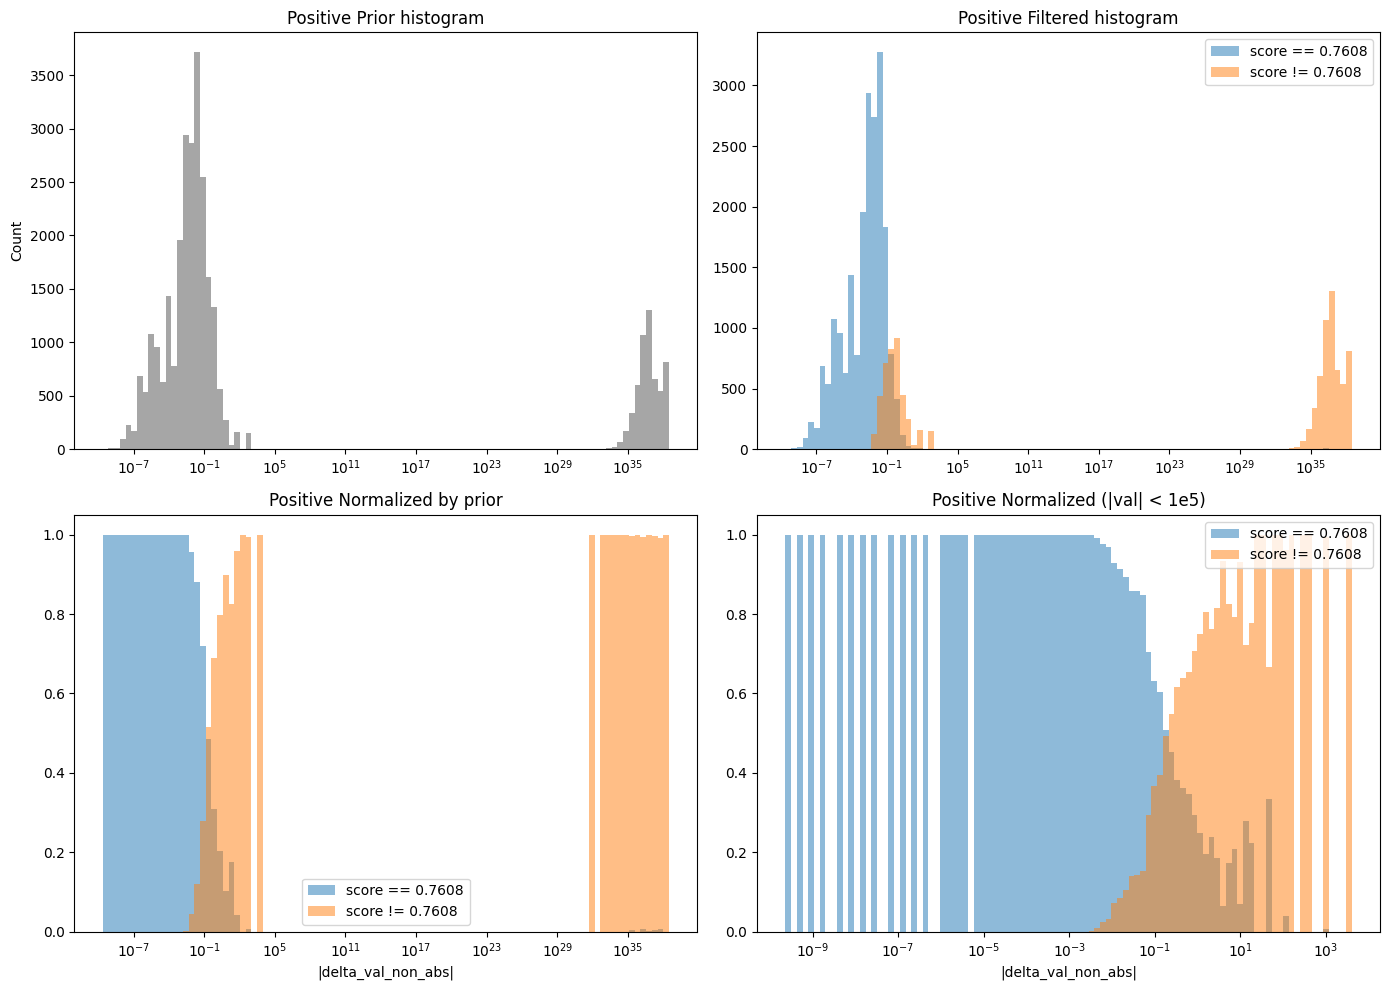

36082    4.656613e-10
306      4.656613e-10
18446    9.313226e-10
35297    9.313226e-10
23258    9.313226e-10
             ...     
55423    8.969392e+37
22142    9.895697e+37
35735    1.294757e+38
22117    1.457197e+38
22141    1.688468e+38
Name: delta_val_non_abs, Length: 30653, dtype: float64
Negative smallest delta_val_non_abs in score != 0.7608: 3.212e-05
Negative crossing point (score==0.7608 < other) at ≈ 2.067e-01


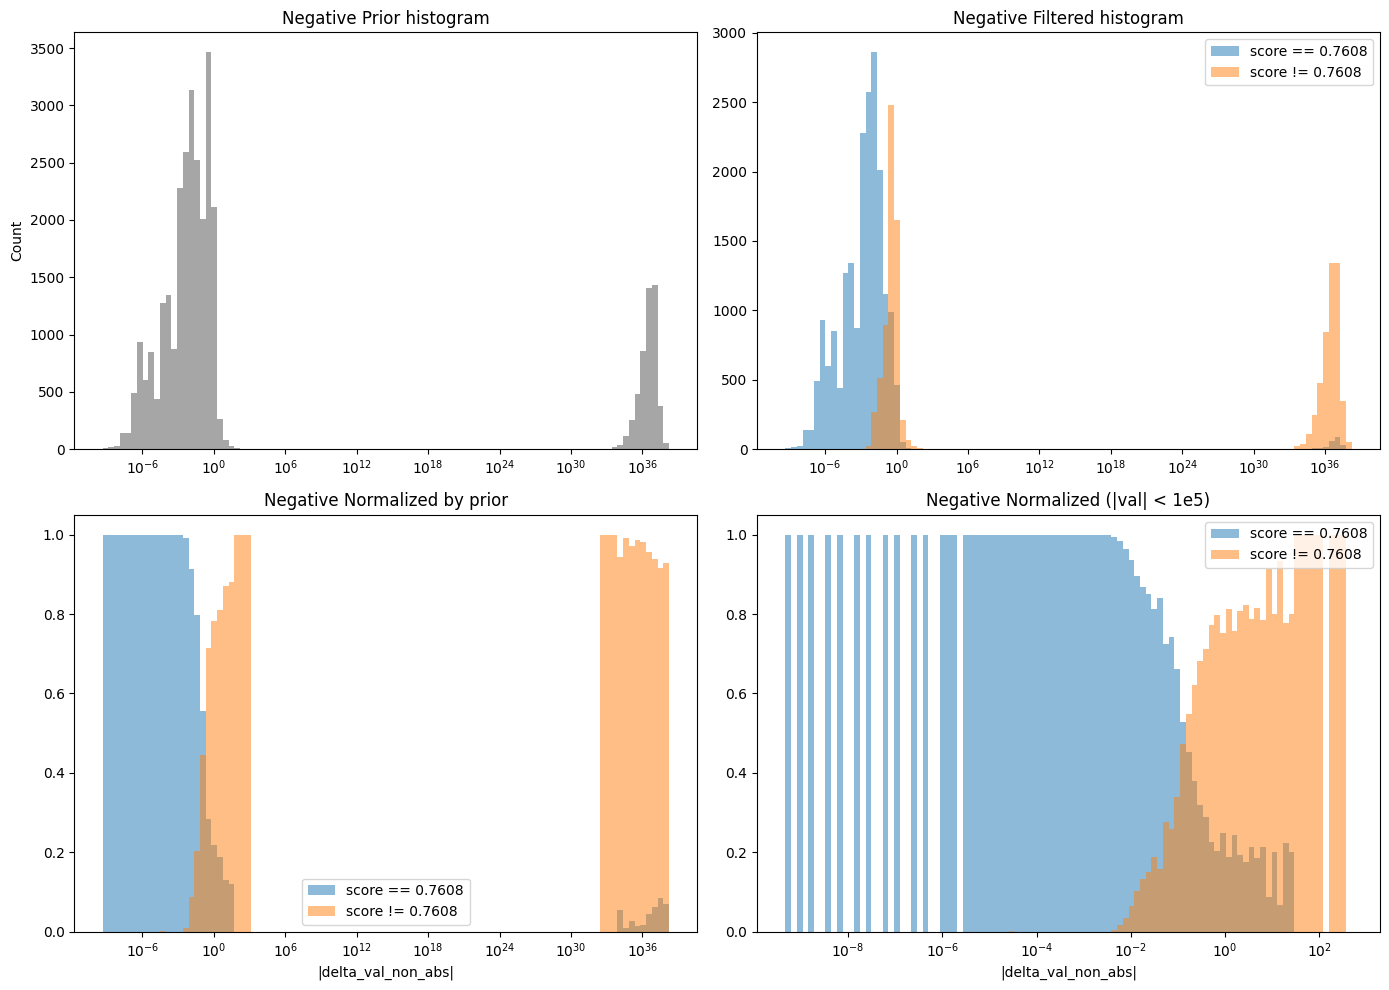

1306     2.328306e-10
7243     4.656613e-10
22860    4.656613e-10
2360     4.656613e-10
36082    4.656613e-10
             ...     
31729    2.968164e+38
59801    3.014393e+38
59809    3.076603e+38
59773    3.168528e+38
59800    3.169022e+38
Name: delta_val, Length: 61041, dtype: float64
 smallest delta_val_non_abs in score != 0.7608: 3.212e-05
 crossing point (score==0.7608 < other) at ≈ 1.314e-01


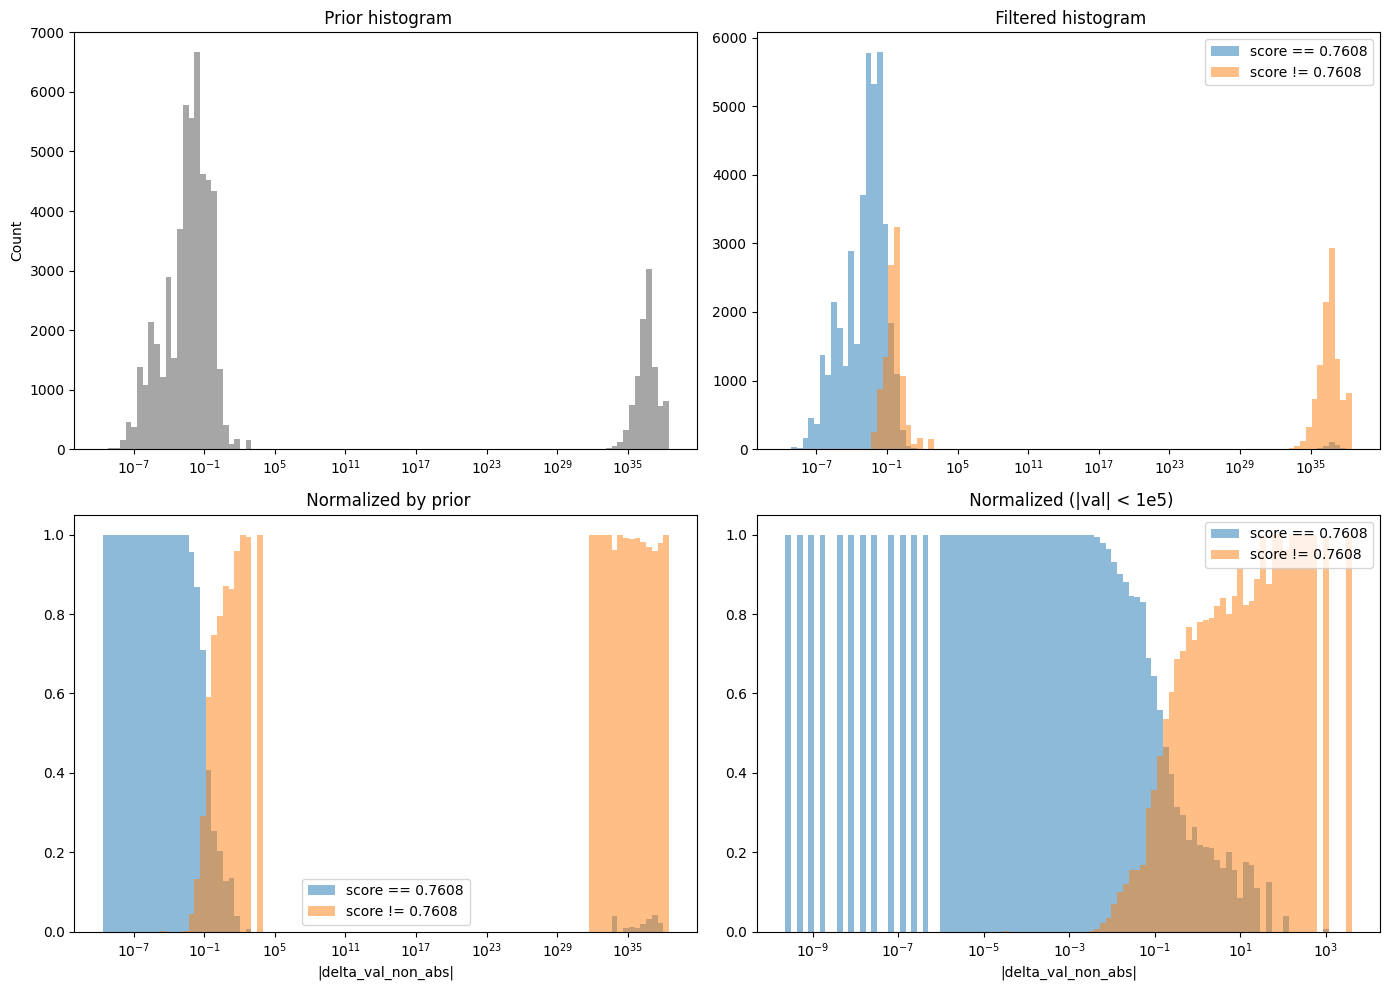

In [61]:
def plot_distributions(df, value_col, score_val=0.7608, sign='positive'):
    import numpy as np
    import matplotlib.pyplot as plt

    epsilon = 1e-10

    if sign == 'positive':
        mask = df[value_col] > 0
        title_prefix = 'Positive'
        x_transform = lambda x: x
    elif sign == 'negative':
        mask = df[value_col] < 0
        title_prefix = 'Negative'
        x_transform = lambda x: -x
    else:
        mask = df[value_col] > 0
        title_prefix = ''
        x_transform = lambda x: x

    vals_all = x_transform(df.loc[mask, value_col])
    print(vals_all)
    vals1 = x_transform(df.loc[mask & (df["criterion_score"] == score_val), value_col])
    vals2 = x_transform(df.loc[mask & (df["criterion_score"] != score_val), value_col])

    # Print smallest delta in != group
    if len(vals2) > 0:
        print(f"{title_prefix} smallest delta_val_non_abs in score != {score_val}: {vals2.min():.3e}")

    min_val = vals_all.min()
    max_val = vals_all.max()
    bins = np.logspace(np.log10(min_val), np.log10(max_val), 100)

    def compute_histograms(vall, val1, val2, bins):
        hist_all, edges = np.histogram(vall, bins=bins)
        hist1, _ = np.histogram(val1, bins=bins)
        hist2, _ = np.histogram(val2, bins=bins)
        return hist_all, hist1, hist2, edges, np.diff(edges)

    hist_all, hist1, hist2, edges, widths = compute_histograms(vals_all, vals1, vals2, bins)
    norm_hist1 = hist1 / (hist_all + epsilon)
    norm_hist2 = hist2 / (hist_all + epsilon)

    # Detect crossing point: where norm_hist1 < norm_hist2
    indices = np.where(norm_hist1 < norm_hist2)[0]
    if len(indices) > 0:
        crossing_idx = indices[0]
        crossing_point = edges[crossing_idx]
        print(f"{title_prefix} crossing point (score=={score_val} < other) at ≈ {crossing_point:.3e}")
    else:
        print(f"{title_prefix} no crossing point found where score == {score_val} < other.")

    # Thresholded (< 1e5)
    thresh_mask = vals_all < 1e5
    vals_all_th = vals_all[thresh_mask]
    vals1_th = vals1[vals1 < 1e5]
    vals2_th = vals2[vals2 < 1e5]

    bins_th = np.logspace(np.log10(vals_all_th.min()), np.log10(vals_all_th.max()), 100)
    hist_all_th, hist1_th, hist2_th, edges_th, widths_th = compute_histograms(vals_all_th, vals1_th, vals2_th, bins_th)
    norm_hist1_th = hist1_th / (hist_all_th + epsilon)
    norm_hist2_th = hist2_th / (hist_all_th + epsilon)

    fig, axs = plt.subplots(2, 2, figsize=(14, 10))

    axs[0, 0].bar(edges[:-1], hist_all, width=widths, align='edge', alpha=0.7, color='gray')
    axs[0, 0].set_xscale('log')
    axs[0, 0].set_title(f'{title_prefix} Prior histogram')
    axs[0, 0].set_ylabel('Count')

    axs[0, 1].bar(edges[:-1], hist1, width=widths, align='edge', alpha=0.5, label=f'score == {score_val}')
    axs[0, 1].bar(edges[:-1], hist2, width=widths, align='edge', alpha=0.5, label=f'score != {score_val}')
    axs[0, 1].set_xscale('log')
    axs[0, 1].set_title(f'{title_prefix} Filtered histogram')
    axs[0, 1].legend()

    axs[1, 0].bar(edges[:-1], norm_hist1, width=widths, align='edge', alpha=0.5, label=f'score == {score_val}')
    axs[1, 0].bar(edges[:-1], norm_hist2, width=widths, align='edge', alpha=0.5, label=f'score != {score_val}')
    axs[1, 0].set_xscale('log')
    axs[1, 0].set_title(f'{title_prefix} Normalized by prior')
    axs[1, 0].set_xlabel('|delta_val_non_abs|')
    axs[1, 0].legend()

    axs[1, 1].bar(edges_th[:-1], norm_hist1_th, width=widths_th, align='edge', alpha=0.5, label=f'score == {score_val}')
    axs[1, 1].bar(edges_th[:-1], norm_hist2_th, width=widths_th, align='edge', alpha=0.5, label=f'score != {score_val}')
    axs[1, 1].set_xscale('log')
    axs[1, 1].set_title(f'{title_prefix} Normalized (|val| < 1e5)')
    axs[1, 1].set_xlabel('|delta_val_non_abs|')
    axs[1, 1].legend()

    plt.tight_layout()
    plt.show()

plot_distributions(df, value_col="delta_val_non_abs", sign='positive')
plot_distributions(df, value_col="delta_val_non_abs", sign='negative')
plot_distributions(df, value_col="delta_val", sign='')


In [58]:
df['delta_val']

1306     2.328306e-10
7243     4.656613e-10
22860    4.656613e-10
2360     4.656613e-10
36082    4.656613e-10
             ...     
31729    2.968164e+38
59801    3.014393e+38
59809    3.076603e+38
59773    3.168528e+38
59800    3.169022e+38
Name: delta_val, Length: 61041, dtype: float64